<a href="https://colab.research.google.com/github/aashigupta1202/decision_tree/blob/master/decision_tree_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [0]:
import numpy as np 
import pandas as pd 

from sklearn.tree import DecisionTreeClassifier

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn import datasets 
from sklearn import tree

**Getting Data**

In [25]:
df= pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Preprocessing**

In [0]:
#dropping PassengerId, Cabin, Ticket and Name variables from the dataset
df = df.drop(['PassengerId'], axis=1)
df = df.drop(['Cabin'], axis=1)
df = df.drop(['Ticket'], axis=1)
df = df.drop(['Name'], axis=1)

#imputing missing values in column Age with its median 
df["Age"] = df["Age"].fillna(df["Age"].median())

#imputing missing values in column Embarked with its mode
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode()[0])

#creating dummy variables for Pclass and Embarked 
#dummy_pclass= pd.get_dummies(df['Pclass'], prefix= 'Pclass').iloc[:, 1:]
#dummy_embarked= pd.get_dummies(df['Embarked'], prefix='Embarked').iloc[:, 1:]
#df= pd.concat([df, dummy_pclass], axis= 1)
#df= pd.concat([df, dummy_embarked], axis= 1)
df= pd.get_dummies(df, columns=['Pclass', 'Embarked'], drop_first=True)

#converting Sex variable
genders = {"male": 0, "female": 1}
df['Sex'] = df['Sex'].map(genders)

**Decision Tree**

In [29]:
#selecting features and target variable
X_train = df.drop("Survived", axis=1)
Y_train = df["Survived"]

#fitting decision tree classifier
decision_tree = DecisionTreeClassifier(max_depth = 3, min_samples_leaf= 10) 
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Visualising decision tree**

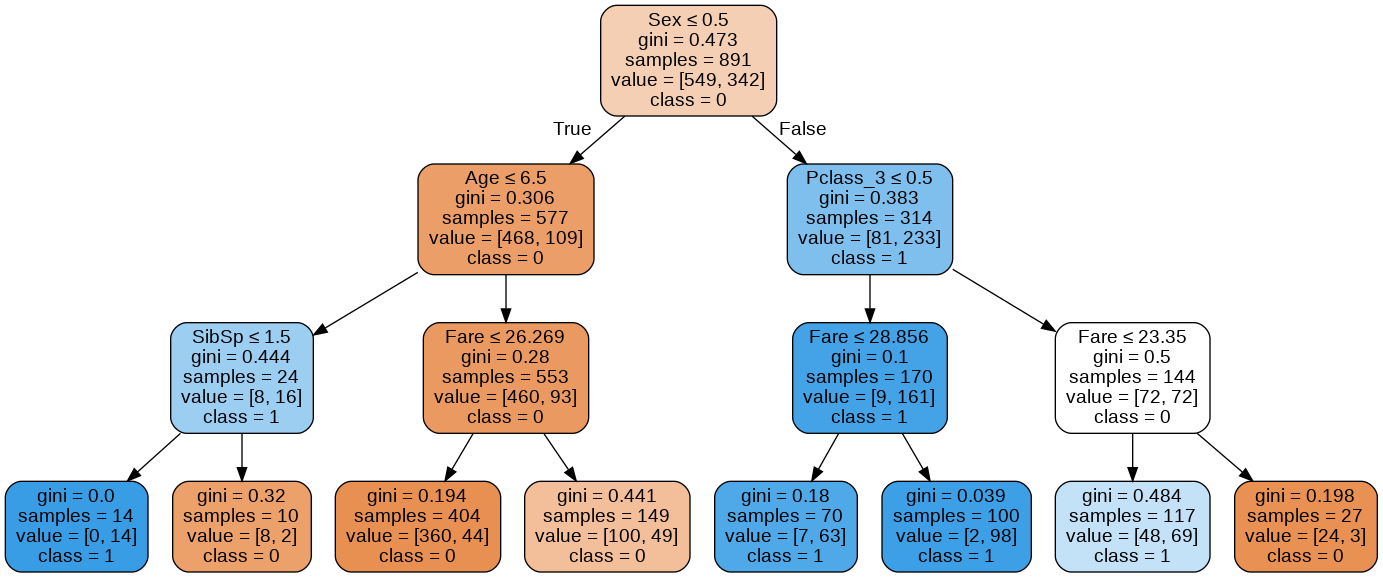

In [31]:
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data, feature_names= X_train.columns, class_names= ['0', '1'],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**There is one more to visualise the tree**

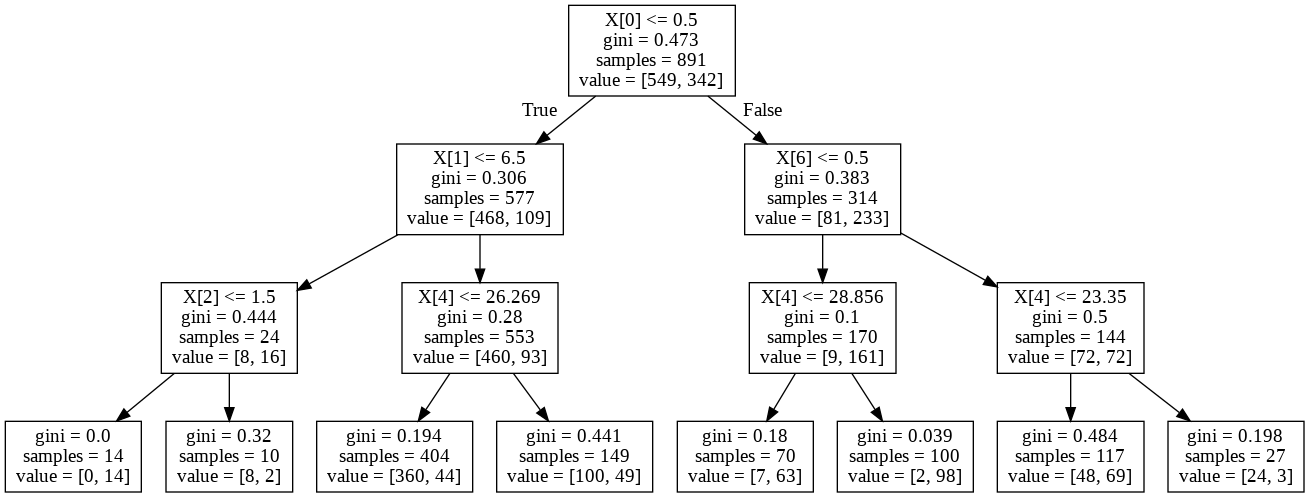

In [33]:
# Create DOT data
dot_data = tree.export_graphviz(decision_tree, out_file=None)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())